# CME 193 - Lecture 5 - Pandas

Before we get started, you may want to make sure that you have the following packages installed in whatever environment you're using: `pandas`

```bash
conda install pandas
```

Pandas is a package for working with tabular data.  

We'll also cover dictionaries and lambda functions today.

At the end of class, we'll have a longer exercise than usual in a supplemental notebook.

# Pandas

[Pandas](https://pandas.pydata.org/) is a Python library for dealing with data.  The main thing you'll hear people talk about is the DataFrame object (inspired by R), which is designed to hold tabular data.

## Difference between a DataFrame and NumPy Array

Pandas DataFrames and NumPy arrays both have similarities to Python lists.  
* Numpy arrays are designed to contain data of one type (e.g. Int, Float, ...)
* DataFrames can contain different types of data (Int, Float, String, ...)
    * Usually each column has the same type
    
    
Both arrays and DataFrames are optimized for storage/performance beyond Python lists

Pandas is also powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

## Key Features

* File I/O - integrations with multiple file formats
* Working with missing data (.dropna(), pd.isnull())
* Normal table operations: merging and joining, groupby functionality, reshaping via stack, and pivot_tables,
* Time series-specific functionality:
    * date range generation and frequency conversion, moving window statistics/regressions, date shifting and lagging, etc.
* Built in Matplotlib integration

## Other Strengths

* Strong community, support, and documentation
* Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects
* Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
* Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects Intelligent label-based slicing, fancy indexing, and subsetting of large data sets

## Python/Pandas vs. R

* R is a language dedicated to statistics. Python is a general-purpose language with statistics modules.
* R has more statistical analysis features than Python, and specialized syntaxes.

However, when it comes to building complex analysis pipelines that mix statistics with e.g. image analysis, text mining, or control of a physical experiment, the richness of Python is an invaluable asset.

# Getting Started

[Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) is a link to the documentation for DataFrames

In [1]:
import pandas as pd
import numpy as np

## Objects and Basic Creation

| Name | Dimensions | Description  |
| ------:| -----------:|----------|
| ```pd.Series``` | 1 | 1D labeled homogeneously-typed array |
| ```pd.DataFrame```  | 2| General 2D labeled, size-mutable tabular structure |
| ```pd.Panel``` | 3|  General 3D labeled, also size-mutable array |

# Series
## What are they?
- Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index.
- Basic method to create a series: 
```python 
s = pd.Series(data, index = index) ```
- Data Can be many things:
    * A Python Dictionary
    * An ndarray (or reg. list)
    * A scalar 
- The passed index is a list of axis labels (which varies on what data is)

Think "Series = Vector + labels"

In [ ]:
first_series = pd.Series([1,2,4,8,16,32,64])
print(type(first_series))
print(first_series)

In [ ]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)
print('-'*50)
print(s.index)

If Data is a dictionary, if index is passed the values in data corresponding to the labels in the index will be pulled out, otherwise an index will be constructed from the sorted keys of the dict

In [ ]:
d = {'a': [0., 0], 'b': {'1':1.}, 'c': 2.}
pd.Series(d)

### Side Note: Dictionaries

We've seen Python lists.  Dictionaries are just another built-in Python data structure.  Dictionaries consist of key-value pairs, and are constructed using 
```python
D = { key : value, ...}```

In [ ]:
D = {1 : 5, 2 : 6}
# iteration over dictionary
for (k,v) in D.items():
    print("key : %d   value : %d" % (k, v))
    
    
print("\n\n")
D = {'a' : 1, 'b' : 2}
D['c'] = 3 # another way to set a key-value pair
# another way to iterate
for k in D:
    v = D[k] # access value with key k
    print("key : %s   value : %d" % (k, v))

### Back to Pandas series...

You can create a series from a scalar, but need to specify indices

In [ ]:
pd.Series(5, index = ['a', 'b', 'c'])

You can index and slice series like you would numpy arrays/python lists

In [37]:
end_string = '\n' + '-'*50 + '\n'
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)

a   -1.692521
b    1.703111
       ...   
d    0.154440
e   -0.674551
Length: 5, dtype: float64


In [ ]:
print(s[0], end = end_string)
# slicing
print(s[:3], end =end_string)

In [ ]:
# conditional max - index with booleans
print(s[ s > s.mean()], end = end_string)
# elementwise function - vectorization
print(np.exp(s), end = end_string)

Series are also like dictionaries - you can access values using index labels

In [ ]:
print(s, end = end_string)
print(s['a'], end = end_string)

In [ ]:
s['e'] = 12 # set element using index label
print(s, end = end_string)
print('e' in s, end = end_string) # check for index label
print(s.get('f', None), end = end_string) # get item with index 'f' - if no such item return None
print(s.get('e', None), end = end_string)

### Series Attributes:

- Get the index : 
```python 
s.index ``` 
- Get the values :
``` python 
s.values ``` 
- Find the shape : 
``` python 
s.shape ``` 

### Series Iteration

In [ ]:
for idx,val in s.iteritems():
    print(idx,val)

Sort by index or by value

In [ ]:
print(s.sort_index(), end = end_string)
print(s.sort_values(), end = end_string)

Find counts of unique values

In [ ]:
s = pd.Series([0,0,0,1,1,1,2,2,2,2])
sct = s.value_counts() # what is the type of sct?
print(sct)

You can do just about anything you can do with a numpy array

- Series.mean()
- Series.median()
- Series.mode()
- Series.nsmallest(num)
- Series.max ...

In [ ]:
print(s.min(),end = end_string)
print(s.max(), end = end_string)

# DataFrame
- DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object.
- You can create a DataFrame from:
    - Dict of 1D ndarrays, lists, dicts, or Series
    - 2-D numpy array
    - A list of dictionaries
    - A Series
    - Another Dataframe
``` python
df = pd.DataFrame(data, index = index, columns = columns)
```
- ```index```/ ``` columns ``` is a list of the row/ column labels. If you pass an index and/ or columns, you are guarenteeing the index and /or column of the df. 
- If you do not pass anything in, the input will be constructed by "common sense" rules

[**pandas.DataFrame**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

# DataFrame Creation From dict of series or dicts
- The index of the resulting DataFrame will be the union of the indices of the various Series. If there are any nested dicts, these will be first converted to Series. 
- If no columns are passed, the columns will be the sorted list of dict keys.

In [ ]:
# Create a dictionary of series
d = {'one': pd.Series([1,2,3], index  = ['a', 'b', 'c']), 
     'two': pd.Series(list(range(4)), index = ['a','b', 'c', 'd'])}
df = pd.DataFrame(d)
print(df, end = end_string)

d= {'one': {'a': 1, 'b': 2, 'c':3}, 
     'two': pd.Series(list(range(4)), index = ['a','b', 'c', 'd'])}
# Columns are dictionary keys, indices and values obtained from series
df = pd.DataFrame(d)
# Notice how it fills the column one with NaN for d
print(df, end = end_string)

In [ ]:
d = {'one': pd.Series([1,2,3], index  = ['a', 'b', 'c']), 
     'two': pd.Series(list(range(4)), index = ['a','b', 'c', 'd'])}

print(pd.DataFrame(d, index = ['d', 'b', 'a']), end = end_string)
print(pd.DataFrame(d, index = ['d', 'b', 'a'], columns = ['two', 'three']),
      end = end_string)

In [ ]:
# Accessing attributes
print(df.index, end = end_string)
print(df.columns,end = end_string)
print(df.shape)

# From dict of ndarray / lists
- The ndarrays must all be the same length. 
- If an index is passed, it must clearly also be the same length as the arrays. If no index is passed, the result will be range(n), where n is the array length.

In [ ]:
d = {'one' : [1., 2., 3., 4.], 'two' : [4., 3., 2., 1.]}
pd.DataFrame(d)

# From a list of dicts

In [ ]:
data = []
for i in range(100):
    data += [ {'Column' + str(j):np.random.randint(100) for j in range(5)} ]
    # dictionary comprehension!
    
data[:5]

In [ ]:
# Creation from a list of dicts
df = pd.DataFrame(data)
print(df.head(), end = end_string)

In [ ]:
# Only certain columns
df = pd.DataFrame(data, columns = ['Column0', 'Column1'])
print(df.head(), end = end_string)

## Attributes

- ``` df.index ``` : the row index of df
- ``` df.columns ``` : the columns of df
- ``` df.shape ``` : the shape of the df
- ``` df.values ``` : numpy array of values

In [ ]:
# Adding and accessing columns 
d = {'one': pd.Series([1,2,3], index  = ['a', 'b', 'c']), 
     'two': pd.Series(range(4), index = ['a','b', 'c', 'd'])}
df = pd.DataFrame(d)
# multiply 
df['three'] =  df['one']*df['two']
# Create a boolean flag
df['flag'] = df['one'] > 2
print(df.head())

In [ ]:
# inserting column in specified location, with values
df.insert(1, 'bar', df['one'][:2])
print(df.head())

In [ ]:
# Deleting Columns  
three = df.pop('three')
print(df.head(), end = end_string)
# Propation of values
df['foo'] = 'bar'
print(df, end = end_string)

## Indexing and Selection 

- 4 methods ``` [], ix, iloc, loc ```

| Operation  | Syntax       | Result | 
|----|----------------------| ---------------------------|
| Select Column | df[col]   |    Series                      |
| Select Row by Label | df.loc[label] | Series  |
| Select Row by Integer Location | df.iloc[idx] |      Series                    |
| Slice rows | df[5:10]        |                        DataFrame  | 
| Select rows by boolean | df[mask]   | DataFrame        |

- Note all the operations below are valid on series as well restricted to one dimension

## Simplest form Of Indexing: []
- Series: selecting a label: s[label] 
- DataFrame: selection single or multiple columns: 
``` python 
df['col'] or df[['col1', 'col2']] ``` 
- DataFrame: slicing the rows:
``` python
df['rowlabel1': 'rowlabel2'] ``` 
or 
``` python 
df[boolean_mask] ``` 

In [2]:
# Lets create a data frame
pd.options.display.max_rows = 4
dates = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 4), index=dates, columns=['A', 'B', 'C','D'])
df

,A,B,C,D
2000-01-01,-0.908005,-0.026529,0.672313,-0.720505
2000-01-02,-2.153041,0.528581,1.839829,-0.198518
...,...,...,...,...
2000-01-07,-0.632762,-0.662412,-0.851569,0.973042
2000-01-08,0.470874,0.985101,1.543924,0.265203


In [3]:
# column  'A
df['A']

2000-01-01   -0.908005
2000-01-02   -2.153041
                ...   
2000-01-07   -0.632762
2000-01-08    0.470874
Freq: D, Name: A, Length: 8, dtype: float64

In [4]:
# multiple column 
df[['A', 'B']]

,A,B
2000-01-01,-0.908005,-0.026529
2000-01-02,-2.153041,0.528581
...,...,...
2000-01-07,-0.632762,-0.662412
2000-01-08,0.470874,0.985101


In [6]:
# slice by rows
df['2000-01-01': '2000-01-04']

,A,B,C,D
2000-01-01,-0.908005,-0.026529,0.672313,-0.720505
2000-01-02,-2.153041,0.528581,1.839829,-0.198518
2000-01-03,0.823869,0.182428,1.704732,0.099305
2000-01-04,0.501816,-0.167141,-1.132009,-0.550774


In [8]:
# boolean mask 
df[df['A'] > df['B']].head()

,A,B,C,D
2000-01-03,0.823869,0.182428,1.704732,0.099305
2000-01-04,0.501816,-0.167141,-1.132009,-0.550774
...,...,...,...,...
2000-01-06,0.109266,-0.845030,-0.160808,-0.191415
2000-01-07,-0.632762,-0.662412,-0.851569,0.973042


In [9]:
### You can also access a column by df.colname
df.A
# Assign via []
df['A'] = df['B'].values
df.head()

,A,B,C,D
2000-01-01,-0.026529,-0.026529,0.672313,-0.720505
2000-01-02,0.528581,0.528581,1.839829,-0.198518
...,...,...,...,...
2000-01-04,-0.167141,-0.167141,-1.132009,-0.550774
2000-01-05,-0.693219,-0.693219,0.011016,-1.226720


In [10]:
df.A

2000-01-01   -0.026529
2000-01-02    0.528581
                ...   
2000-01-07   -0.662412
2000-01-08    0.985101
Freq: D, Name: A, Length: 8, dtype: float64

## Selecting by label .loc

- is primarily label based, but may also be used with a boolean array.
- .loc will raise KeyError when the items are not found
- Allowed inputs:
    1. A single label 
    2. A list of labels
    3. A boolean array

In [11]:
## Selection by label .loc
df.loc['2000-01-01']

A   -0.026529
B   -0.026529
C    0.672313
D   -0.720505
Name: 2000-01-01 00:00:00, dtype: float64

In [12]:
# Accessing all greater than a date 
df.loc['2000-01-01':, ['A', 'B']]

,A,B
2000-01-01,-0.026529,-0.026529
2000-01-02,0.528581,0.528581
...,...,...
2000-01-07,-0.662412,-0.662412
2000-01-08,0.985101,0.985101


In [13]:
# Get columns for which value is greater than 0 on certain day, get all rows
df.loc[:, df.loc['2000-01-01'] > 0]

,C
2000-01-01,0.672313
2000-01-02,1.839829
...,...
2000-01-07,-0.851569
2000-01-08,1.543924


## Selecting by position 

- The .iloc attribute is the primary access method. The following are valid input:
    - An integer
    - A list of integers
    - A slice 
    - A boolean array

In [14]:
df1 = pd.DataFrame(np.random.randn(6,4), 
                   index=list(range(0,12,2)), columns=list(range(0,12,3)))

df1

,0,3,6,9
0,-0.616171,-0.032103,-0.379646,-0.294482
2,0.421417,-0.277976,1.974749,-2.134208
...,...,...,...,...
8,-0.599817,0.418941,-0.648587,-0.440540
10,-0.753688,1.237021,0.117436,0.511363


In [15]:
# rows 0-2
df1.iloc[:3]

,0,3,6,9
0,-0.616171,-0.032103,-0.379646,-0.294482
2,0.421417,-0.277976,1.974749,-2.134208
4,0.069048,0.486189,-0.254276,0.380071


In [16]:
#  rows 1:4  and columns 2 : 4
df1.iloc[1:5, 2:4]

,6,9
2,1.974749,-2.134208
4,-0.254276,0.380071
6,-1.611998,1.185215
8,-0.648587,-0.440540


In [19]:
# select via integer list
df1.iloc[[1,3,5], [1,3]]

,3,9
2,-0.277976,-2.134208
6,-0.183890,1.185215
10,1.237021,0.511363


**Discussion for why `.values` works https://github.com/pandas-dev/pandas/issues/3631**

In [20]:
# selecting via integer mask 
boolean_mask = df1.iloc[:, 1] > 0.0
df1.iloc[boolean_mask.values,1]

4     0.486189
8     0.418941
10    1.237021
Name: 3, dtype: float64

# Merging DataFrames

- Pandas has full-featured, very high performance, in memory join operations that are very similar to SQL and R 

- The documentation is https://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging

- Pandas provides a single function, merge, as the entry point for all standard database join operations between DataFrame objects: 
``` python
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
left_index=False, right_index=False, sort=True) ```


In [38]:
# Example of merge
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [4, 2]})
right = pd.DataFrame({'key': ['bar', 'zoo'], 'rval': [4, 5]})

print("left: ",left,"right: ",right, sep=end_string)

left: 
--------------------------------------------------
   key  lval
0  foo     4
1  bar     2
--------------------------------------------------
right: 
--------------------------------------------------
   key  rval
0  bar     4
1  zoo     5


In [39]:
merged = pd.merge(left, right)
print(merged)

   key  lval  rval
0  bar     2     4


In [40]:
merged = pd.merge(left, right, how="outer")
print(merged)

   key  lval  rval
0  foo   4.0   NaN
1  bar   2.0   4.0
2  zoo   NaN   5.0


In [41]:
merged = pd.merge(left, right, how="left")
print(merged)

   key  lval  rval
0  foo     4   NaN
1  bar     2   4.0


In [42]:
merged = pd.merge(left, right, how="right")
print(merged)

   key  lval  rval
0  bar   2.0     4
1  zoo   NaN     5


## Function Application
 - Row or Column-wise Function Application: Applies function along input axis of DataFrame
```python 
df.apply(func, axis = 0) ``` 
 - Elementwise: apply the function to every element in the df 
 ```python 
df.applymap(func) ``` 

- Note, ``` applymap ``` is equivalent to the ``` map ``` function on lists. 
- Note, ``` Series ``` objects support ``` .map ``` instead of ``` applymap ```

In [ ]:
## APPLY EXAMPLES
df1 = pd.DataFrame(np.random.randn(6,4), index=list(range(0,12,2)), columns=list('abcd'))
df1

In [ ]:
# Apply to each column
df1.apply(np.mean)

In [ ]:
# Apply to each row
df1.apply(np.mean, axis = 1)

### Side note: lambda functions

lambda functions allow you to specify a function without giving it a separate declaration.  For example, the function 
```python
lambda x: (x - x.mean())/x.std()
```
is equivalent to the function
```python
def normalize(x):
    return (x - x.mean())/x.std()
```
You'll often see lambda functions used in list comprehensions, or in methods (like `map()`, `apply()`, or `applymap()`) that take a function as input.

In [ ]:
# # Use lambda functions  to normalize columns
df1 = df1.apply(lambda x: (x - x.mean())/ x.std(), axis = 0)
df1

In [ ]:
## APPLY EXAMPLES CONT
# Create DF with 1000 rows and 3 columns filled with random entries
tsdf = pd.DataFrame(np.random.randn(1000, 3), columns=['A', 'B', 'C'],
                    index=pd.date_range('1/1/2000', periods=1000))

tsdf.head()

In [ ]:
# Can get trickier, say I wanted to find where the maximum dates occured for each column of the df:
tsdf.apply(lambda x: x.idxmax())

In [ ]:
## APPLYMAP EXAMPLES
tmp = tsdf.applymap(lambda x: x - 1)
print(tmp.head())

# I/O Functions

- There are loads of input output features. The highlights most useful to you are likely:
    - ``` pd.read_csv ``` / ``` pd.to_csv ``` 
    - ``` pd.read_excel ``` / ``` pd.to_excel ```
    - ``` pd.read_sql ``` / ``` pd.to_sql ```
    - ``` pd.read_pickle ``` / ``` pd.to_pickle ```
Documentation:

* [Pandas Import-Output Functions](https://pandas.pydata.org/pandas-docs/stable/io.html)

### Loading data from CSV
Here are the first several lines of `iris.csv`:

```
sepal_length,sepal_width,petal_length,petal_width,name
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
```

In [ ]:
import pandas as pd
# Can use df.info to find out information about the df 
data = pd.read_csv('./data/iris.csv')
data.info()

In [ ]:
# describe and summarize the dataframe
data.describe()

## The split/apply combo (groupyby)
- pandas objects can be split on any of their axes. The abstract definition of grouping is to provide a mapping of labels to group names:
- Syntax:  
    - ``` groups = df.groupby(key) ```
    - ``` groups = df.groupby(key, axis = 1) ```
    - ``` groups = df.groupby([key1, key2], axis = 1) ```

### A picture

- The group by concept is that we want to apply the same function on subsets of the dataframe, based on some key we use to split the DataFrame into subsets
- This idea is referred to as the "split-apply-combine" operation:
    - Split the data into groups based on some criteria
    - Apply a function to each group independently
    - Combine the results 

![image](./img/splitApplyCombine.png)

In [43]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
...,...,...
7,B,15
8,C,20


In [44]:
groupby_key = df.groupby('key')

sums = groupby_key.aggregate(np.sum)
sums

,data
key,
A,15
B,30
C,45


In [45]:
groupby_key.sum()

,data
key,
A,15
B,30
C,45


# Plotting data

- The plot method on Series and DataFrame is just a wrapper on matplotlib plt.plot()
- Many available plots:
    - ‘bar’ or ‘barh’ for bar plots
    - ‘hist’ for histogram
    - ‘box’ for boxplot
    - ‘kde’ or 'density' for density plots • ‘area’ for area plots
    - ‘scatter’ for scatter plots
    - ‘hexbin’ for hexagonal bin plots • ‘pie’ for pie plots
    
- There are several more complex plotting functions in pandas.tools.plotting that take a Series or DataFrame as an argument. These include:
    - Scatter matrices
    - Andrews Curves
    - Autocorrelation
    - Bootstrap Plot

In [46]:
import matplotlib.pyplot as plt

In [47]:
data.plot();

NameError: name 'data' is not defined

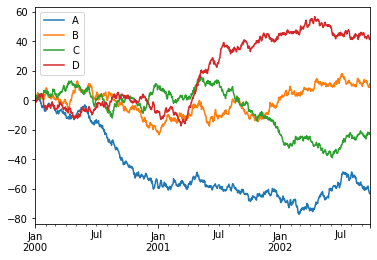

In [48]:
## Quick example - Random walks
df = pd.DataFrame(np.random.randn(1000, 4), index =pd.date_range('1/1/2000', periods=1000), columns=list('ABCD'))
df = df.cumsum()
df.plot()
plt.show()

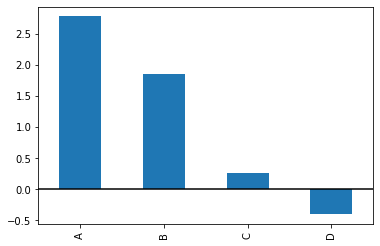

In [50]:
plt.figure()
df.iloc[5].plot(kind = 'bar')
plt.axhline(0, color = 'k')

In [ ]:
data = pd.read_csv('./data/iris.csv')
ax = data.groupby('name') \
         .get_group('setosa') \
         .boxplot(column=["sepal_length","sepal_width"], return_type='axes')

# Exercise

Work through the supplement notebook, posted online.